<a href="https://colab.research.google.com/github/omkar123katare/cramers-s-V-test_Feature_engineering_categorical_columns/blob/main/Cramers_V_test_for_categorical_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**WHAT  -**Cramer's V test gives strength of relationship between two categorical columns. It is like pearson's correlation coefficient for continuous columns.

Cramers V test is an extension of chi2 test.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
churn_data_master=pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv')

In [47]:
churn_data=churn_data_master.copy()

In [48]:
churn_data.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


Here we will check importance of categorical columns -'gender','contract','paperlessBilling' which have impact on target column - 'churn'.

Lets look at correlation between all the numerical variables using pearson's correlation

In [49]:
# For correlation between all the numerical variables
churn_data.corr()

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,-0.090899,0.220173,0.100795
tenure,0.016567,1.000000,0.508526,0.247900,0.826066
ServiceCount,-0.090899,0.508526,1.000000,0.041463,0.443768
MonthlyCharges,0.220173,0.247900,0.041463,1.000000,0.650964
TotalCharges,0.100795,0.826066,0.443768,0.650964,1.000000


##**Importance of Contract column to predict Churn column**

Now, for categorical columns, lets use Cramers test. We first get statistical significance of relationship between contract column and churn column. Then we from this we will find the strength of this particular correlation. (cramers V test tells us hoe strong is the correlation between the two categorical variables.)

In [50]:
churn_data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

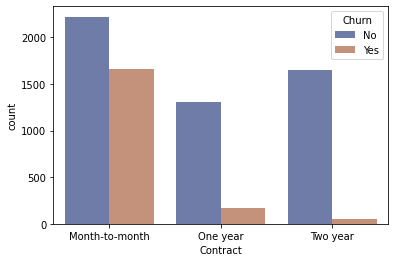

In [51]:
# Draw a nested barplot by species and sex
g = sns.countplot(
    data=churn_data,
    x="Contract", hue="Churn", palette="dark", alpha=.6
)

Visually we can see that there is different count for Churn count according to different categories of contract. So, while predicting if customer has churned, contract should column play an important role.

1. customers who bought Month on month contract have churned more. 
2. People who bought one year contract have chunred less. 
3. People who bought two year contracts have churned even lesser.

**chi-square statistic.**
X^2=sum((Observed-Expected)^2/Expected)

**Cramers V test**
V=SQRT(chi2/(n*(min(C,R)-1))

In [52]:
cross_tab_contract_churn=pd.crosstab(columns=churn_data['Contract'],index=churn_data['Churn'])

In [53]:
# This is a contengency table. This table is used to summarize the categorical columns in a dataset.
cross_tab_contract_churn
# input to chi-square test is a contingency table.

Contract,Month-to-month,One year,Two year
Churn,,,
No,2220,1307,1647
Yes,1655,166,48


In [54]:
from scipy import stats
(chi2,p,dof,_)=stats.chi2_contingency([cross_tab_contract_churn.iloc[0].values,cross_tab_contract_churn.iloc[1].values])

In [55]:
print(chi2)
print(p)

1184.5965720837926
5.863038300673391e-258


This 1184.59 value cannot be compares to a standard value to get relative idea about the strength of relationship between 2 categorical columns. Hence we go for Cramers V test. Here we get the strength of relationship value within a standard scale, which can be compared easily with other cramers values for other columns. Cramers V value is always in the scale of 0 to 1.

p value is way less than 0.05. Hence this is an important column. ***(Apha value is 0.05 i.e.We can tolerate 5 errors in 100 values. Here we are getting p value as 5.86e-256 eoors in 100 values.)*** Hence this column is important.

**Lets confirm this using Cramers V test.**


**Cramers V test**
V=SQRT(chi2/(n*(min(C,R)-1))

In [56]:
import numpy as np

In [57]:
# n is number of samples we have
n=churn_data.shape[0]
min=min(2,3)

In [60]:
# input to cramers test is chi2 value
cramer_V=np.sqrt(chi2/n*(min-1))

In [64]:
# value will lie in scale of 0 to 1
print(cramer_V)

0.4101156965761409


**cramer_V value being between 0 and 1, makes it easy to do comparitive study**. If the number is near 1, strength of relationship is more. And if the number is closer to 0, strength of relationship is less.

0.41 is a descent level of correlation between two categorical columns.
**Hence contract column is important for predicting churn.**

##**Importance of gender column to predict Churn column**

In [71]:
cross_tab_gender_churn=pd.crosstab(columns=churn_data['gender'],index=churn_data['Churn'])

In [72]:
(chi2,p,dof,_)=stats.chi2_contingency([cross_tab_gender_churn.iloc[0].values,cross_tab_gender_churn.iloc[1].values])

In [73]:
# n is number of samples we have
n=churn_data.shape[0]
min=2

In [74]:
# input to cramers test is chi2 value
cramer_V=np.sqrt(chi2/n*(min-1))

In [75]:
# value will lie in scale of 0 to 1
print(cramer_V)

0.008290505631771371


0.0083 is a very bad level of correlation between two categorical columns.

**Hence gender column is not important for predicting churn.**

##**Importance of PaperlessBilling column to predict Churn column**

In [76]:
cross_tab_PaperlessBilling_churn=pd.crosstab(columns=churn_data['PaperlessBilling'],index=churn_data['Churn'])

In [77]:
(chi2,p,dof,_)=stats.chi2_contingency([cross_tab_PaperlessBilling_churn.iloc[0].values,cross_tab_PaperlessBilling_churn.iloc[1].values])

In [78]:
# n is number of samples we have
n=churn_data.shape[0]
min=2

In [79]:
# input to cramers test is chi2 value
cramer_V=np.sqrt(chi2/n*(min-1))

In [80]:
# value will lie in scale of 0 to 1
print(cramer_V)

0.19149814355338285


0.19 is a somewhat descent level of correlation between two categorical columns.
**Hence contract column is somewhat important for predicting churn.**

**What is the difference between chi2 statstic and cramers's V test**
1. Chi2 test gave significance of realtionship and was hard to interprete. Cramers test gives strength of relationship.
2. chi2 and cramers test are similar to covariance and correlation. Covaiance shoes the direction but not the strength. Where as correlation shows the strength of relationship between two continuous columns.

**chi-square statistic.**
X^2=sum((Observed-Expected)^2/Expected)

**Cramers V test**
V=SQRT(chi2/(n*(min(C,R)-1))

**Major difference -**We can see that in chi-square test, if number of categories is large, X^2 value will go on increasing. Where as in Cramers V test, even if number of categories is large, it is normalized, this mkaes it suitable even for large number of categories. So, in Cramers V test, we always get value between 0 and 1 , which shows strength of relationship between two categorical columns.

**Cramers_V** is very similar to the**Person's correlation coefficient.**